In [14]:
%matplotlib inline

In [15]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage, imread
from matplotlib.transforms import Bbox
from PIL import Image
import seaborn as sns

In [29]:
# read images
#mpl.rcParams["savefig.dpi"] = mpl.rcParams["figure.dpi"]
IMG_ROOT = "./images"

image_paths = os.listdir("./images")
image_paths = [os.path.join(IMG_ROOT, p) for p in image_paths]
images = [Image.open(p) for p in image_paths]
print(images)

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x10E6B13C8>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=64x64 at 0x10E6B15C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x10E6B14E0>]


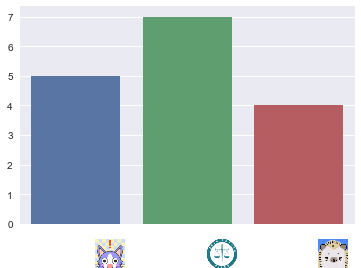

In [56]:
# show graph

y = np.random.randint(10, size=len(images))
x = np.array(range(len(images)))
ax = sns.barplot(x=x, y=y, ci=None)

# erase ticks
ax.get_xaxis().set_ticklabels([], fontsize=45)  # expand label size by fontsize parameter
TICK_POS = -0.25
SIZE_IN_TICK = 1

scale = ax.transData.transform((1, 1)) - ax.transData.transform((0, 0))
x_scale = scale[0] / scale[1]

for i, _x in enumerate(x):
    label_x = _x  # adjustment is not needed in saved file
    left = label_x - (SIZE_IN_TICK / x_scale / 2)
    down = TICK_POS - SIZE_IN_TICK
    right = label_x + (SIZE_IN_TICK / x_scale / 2)
    top = TICK_POS
    leftDown = ax.transData.transform((left, down))
    rightUpper = ax.transData.transform((right, top))
    bbox_image = BboxImage(Bbox([leftDown, rightUpper]),
                           norm = None,
                           origin=None,
                           clip_on=False
                          )
    bbox_image.set_data(images[i])
    ax.add_artist(bbox_image)


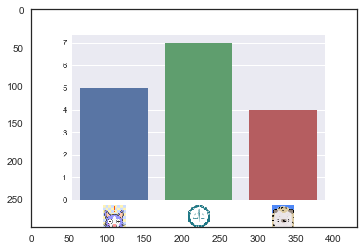

In [57]:
fig = ax.get_figure()
fig.savefig("icon_plot.PNG")
with sns.axes_style("white"):
    plt.imshow(Image.open("icon_plot.PNG"))